# Library&Package Import

In [1]:
import pandas as pd
import numpy as np

## Export the dataset:

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## Normalization:

In [3]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['Kingdom']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

## Data split:

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 64) (2593, 64) (10369,) (2593,)


## Model training:

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_LSTM = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test,y_test)) 


Epoch 1/15
325/325 [==============================] - 1s 3ms/step - loss: 1.3680 - accuracy: 0.4945 - val_loss: 1.1787 - val_accuracy: 0.5457
Epoch 2/15
325/325 [==============================] - 1s 2ms/step - loss: 1.1143 - accuracy: 0.5260 - val_loss: 1.0298 - val_accuracy: 0.5453
Epoch 3/15
325/325 [==============================] - 1s 2ms/step - loss: 0.9913 - accuracy: 0.5551 - val_loss: 0.9350 - val_accuracy: 0.5966
Epoch 4/15
325/325 [==============================] - 1s 2ms/step - loss: 0.9033 - accuracy: 0.6178 - val_loss: 0.8683 - val_accuracy: 0.6302
Epoch 5/15
325/325 [==============================] - 1s 2ms/step - loss: 0.8409 - accuracy: 0.6403 - val_loss: 0.8168 - val_accuracy: 0.6475
Epoch 6/15
325/325 [==============================] - 1s 2ms/step - loss: 0.7918 - accuracy: 0.6658 - val_loss: 0.7739 - val_accuracy: 0.6811
Epoch 7/15
325/325 [==============================] - 1s 2ms/step - loss: 0.7493 - accuracy: 0.7082 - val_loss: 0.7373 - val_accuracy: 0.7497
Epoch 

In [6]:
y_pred = model.predict(x_test)
y_pred1 = np.zeros(y_pred.shape[0])
for index, value in enumerate(y_pred):
    y_pred1[index] = np.argmax(y_pred[index])

82/82 [==============================] - 0s 985us/step


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1_micro = f1_score(y_test, y_pred1, average='micro')
f1_macro = f1_score(y_test, y_pred1, average='macro')
print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_micro: ',f1_micro)
print('f1_macro: ',f1_macro)

accuracy_score:  0.8191284226764366
precision_score:  0.7984150801335197
recall_score:  0.8191284226764366
f1_micro:  0.8191284226764366
f1_macro:  0.4845865000113805


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Training and Validation Loss')

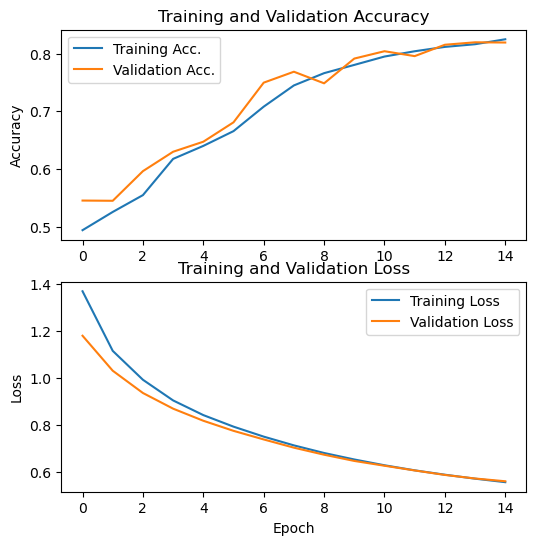

In [9]:
import matplotlib.pyplot as plt
acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']

loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Acc.')
plt.plot(val_acc, label='Validation Acc.')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[   0   10    2    0    9]
 [   0  491   33    0   20]
 [   0   70 1241    0  104]
 [   0   31   10    0    2]
 [   0   25  153    0  392]]

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.78      0.90      0.84       544
           2       0.86      0.88      0.87      1415
           3       0.00      0.00      0.00        43
           4       0.74      0.69      0.71       570

    accuracy                           0.82      2593
   macro avg       0.48      0.49      0.48      2593
weighted avg       0.80      0.82      0.81      2593



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Optimized Model:

In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])


model1.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history_LSTM1 = model1.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test,y_test)) 


Epoch 1/15
325/325 [==============================] - 1s 2ms/step - loss: 0.6270 - accuracy: 0.7728 - val_loss: 0.4597 - val_accuracy: 0.8218
Epoch 2/15
325/325 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8851 - val_loss: 0.2887 - val_accuracy: 0.9024
Epoch 3/15
325/325 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9087 - val_loss: 0.2588 - val_accuracy: 0.9071
Epoch 4/15
325/325 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9212 - val_loss: 0.2902 - val_accuracy: 0.8951
Epoch 5/15
325/325 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9266 - val_loss: 0.2163 - val_accuracy: 0.9252
Epoch 6/15
325/325 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9318 - val_loss: 0.2060 - val_accuracy: 0.9290
Epoch 7/15
325/325 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.9359 - val_loss: 0.2026 - val_accuracy: 0.9267
Epoch 

In [12]:
y_pred = model1.predict(x_test)
y_pred1 = np.zeros(y_pred.shape[0])
for index, value in enumerate(y_pred):
    y_pred1[index] = np.argmax(y_pred[index])

82/82 [==============================] - 0s 1ms/step


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1_micro = f1_score(y_test, y_pred1, average='micro')
f1_macro = f1_score(y_test, y_pred1, average='macro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_micro: ',f1_micro)
print('f1_macro: ',f1_macro)

accuracy_score:  0.9421519475510991
precision_score:  0.9434712800955324
recall_score:  0.9421519475510991
f1_micro:  0.9421519475510991
f1_macro:  0.8150553258026367


Text(0.5, 1.0, 'Training and Validation Loss')

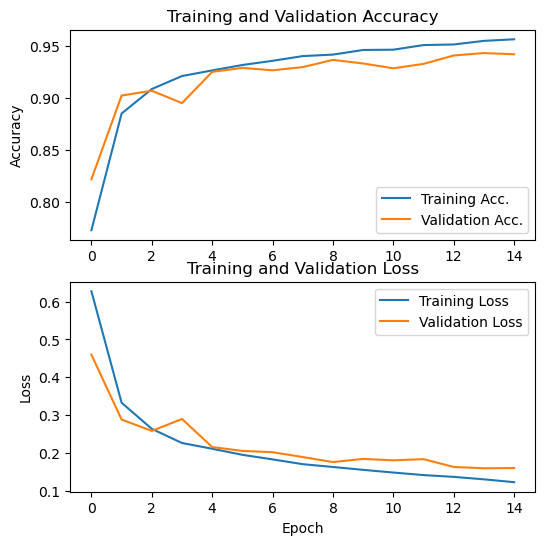

In [15]:
acc = history_LSTM1.history['accuracy']
val_acc = history_LSTM1.history['val_accuracy']

loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Acc.')
plt.plot(val_acc, label='Validation Acc.')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[  11    8    0    0    2]
 [   7  504   15   14    4]
 [   0   15 1346    1   53]
 [   0   11    0   32    0]
 [   2    1   17    0  550]]

Classification report :
               precision    recall  f1-score   support

           0       0.55      0.52      0.54        21
           1       0.94      0.93      0.93       544
           2       0.98      0.95      0.96      1415
           3       0.68      0.74      0.71        43
           4       0.90      0.96      0.93       570

    accuracy                           0.94      2593
   macro avg       0.81      0.82      0.82      2593
weighted avg       0.94      0.94      0.94      2593

